In [13]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
process = '''

1)  Determine action and state spaces
2)  Create Q Table accordingly
3)  Define Hyperparameters
4)  Plotting Metrics
5)  Initialize Environment (env.reset())
6)  Exploit vs Explore
7)  Action process, reward and observations
8)  Function
9)  Update Table
10) Update state
11) Find wrong dropouts

'''

In [12]:
env = gym.make('FrozenLake-v0')

In [14]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [17]:
env.observation_space, env.action_space

(Discrete(16), Discrete(4))

In [18]:
sta = env.observation_space.n
act = env.action_space.n

In [19]:
q_table = np.zeros([sta,act])
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [20]:
#Hyperparameters
alpha = 0.1
gamma = 0.9
epsilon = 0.1

In [21]:
#Plotting Metric
reward_data = []

In [33]:
episodes = 10001

for i in range(1,episodes):
    
    
    state = env.reset()
    
    rewards = 0
    
    while True:
        
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        
        else:
            action = np.argmax(q_table[state])
            
        
        next_state, reward, done, _ = env.step(action)
        
        old_value = q_table[state,action]
        next_max = np.max(q_table[next_state])
        
        next_value = (1-alpha)*old_value + alpha*(reward + gamma*next_max)
            
        q_table[state,action] = next_value
        
        state = next_state 
        rewards += 1
        
        if done:
            break
        
    if i%500 == 0:
        reward_data.append(rewards)
        print("Episode: {}, Rewards: {}".format(i,rewards))



Episode: 500, Rewards: 17
Episode: 1000, Rewards: 18
Episode: 1500, Rewards: 38
Episode: 2000, Rewards: 14
Episode: 2500, Rewards: 29
Episode: 3000, Rewards: 6
Episode: 3500, Rewards: 12
Episode: 4000, Rewards: 21
Episode: 4500, Rewards: 33
Episode: 5000, Rewards: 43
Episode: 5500, Rewards: 8
Episode: 6000, Rewards: 29
Episode: 6500, Rewards: 30
Episode: 7000, Rewards: 34
Episode: 7500, Rewards: 2
Episode: 8000, Rewards: 17
Episode: 8500, Rewards: 65
Episode: 9000, Rewards: 15
Episode: 9500, Rewards: 10
Episode: 10000, Rewards: 24


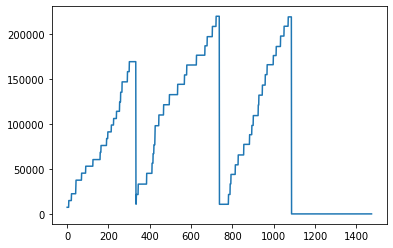

In [34]:
plt.plot(reward_data)

In [31]:
from pandas import DataFrame
data = DataFrame(reward_data)
data.head(350)

,0
0,7376
1,7377
2,7378
3,7379
4,7380
5,7381
6,7382
7,7383
8,14881
9,14882
